## 損失関数（Loss Functions）

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from IPython.display import display, Markdown, Latex
from sklearn.datasets import load_iris, load_boston

In [2]:
dataset = load_iris()
X_iris = dataset.data
y_iris = dataset.target
dataset = load_boston()
X_boston = dataset.data
y_boston = dataset.target;

/Users/mriki/.pyenv/versions/miniforge3-4.10.3-10/envs/datasci/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative d

### 平均二乗誤差（MSE; Mean Squared Error, RMSE; Root Mean Squared Error）

正解の値と予測した値との誤差．二乗することで下に凸な関数になるのでニューラルネットワークの損失関数として利用しやすい．

- $N$：特徴の数
- $y_i$：正解値
- $\hat{y}_i$：予測値

$$
\operatorname{MSE} = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-y_i)^2
$$

In [5]:
y_hat_boston = np.random.normal(y_boston.mean(), scale=y_boston.std(), size=y_boston.shape)

mean_squared_error = lambda y_hat,y: np.mean((y_hat-y)**2,axis=-1)

y = np.zeros([1000,2])
y_hat = np.linspace(-50,50,2000).reshape([-1,2])
loss = mean_squared_error(y_hat,y)
print(loss.shape)

(1000,)


(256, 256) (256, 256) (256, 256)


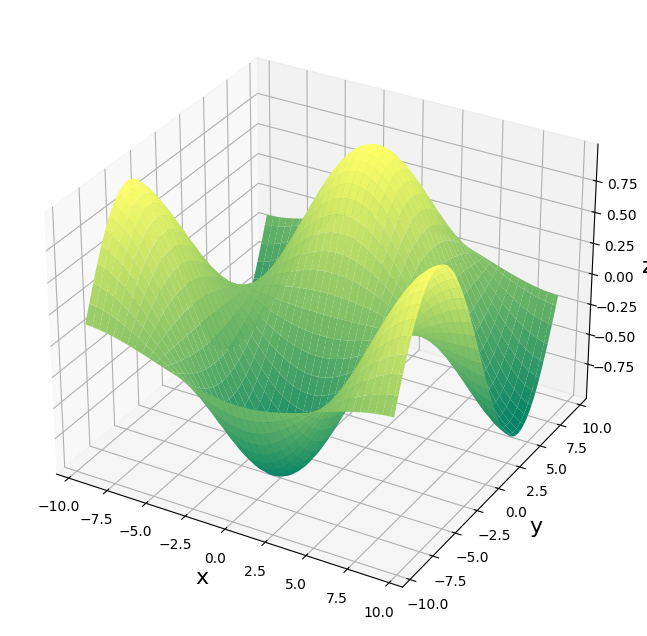

In [21]:
#y_hat_boston

(400, 400)
(400, 400)
(400, 400)


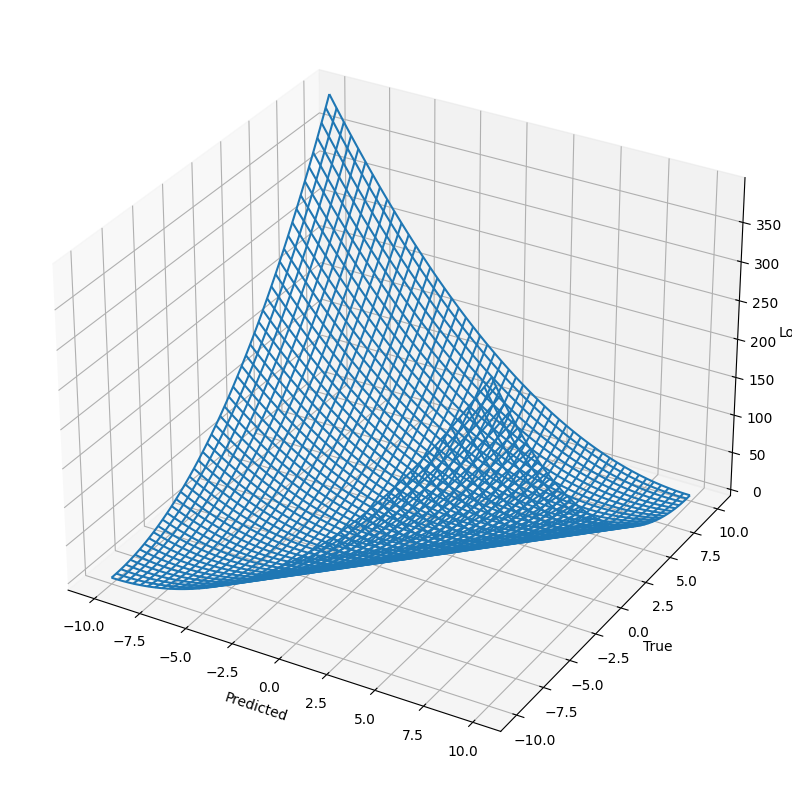

In [19]:
fig = plt.figure(figsize=(10, 10)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
x = np.arange(-10, 10, 0.05) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(-10, 10, 0.05)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成

z = (x-y)**2 #を計算してzz座標へ格納する。

print(x.shape)
print(y.shape)
print(z.shape)

ax.plot_wireframe(x, y, z) # ワイヤーフレーム図

#ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='hsv', linewidth=0.3) # 曲面のプロット。rstrideとcstrideはステップサイズ，cmapは彩色，linewidthは曲面のメッシュの線の太さ，をそれぞれ表す。
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_zlabel("Loss")
plt.show() # 絵の出力。

y.shape